# 2. Startup Dataset
**Source:** https://www.kaggle.com/datasets/farhanmd29/50-startups
\
**Objective:** Examine the relationship between investment and startup profit.
\
**colomns:** This dataset has data collected from New York, California and Florida about 50 business Startups "17 in each state". The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

1. R&D Spend
2. Administration
3. Marketing Spend
4. State
5. Profit

In [38]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
import warnings
warnings.filterwarnings('ignore')

In [39]:
#reading the dataset
data = pd.read_csv("/content/50_Startups.csv")

In [40]:
#printing the dataset
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [41]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


From the info we can see
1. The data has 50 rows and 5 columns
2. There are no null values but has colomn with categorial data




In [42]:
#Printing the datatypes in the data
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [43]:
#Print the duplicated rows
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [44]:
#Rounding of the decimal point to 2
round(data.describe(), 2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


1. From describing data we can see Marketing spend has some diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns for futher analysis


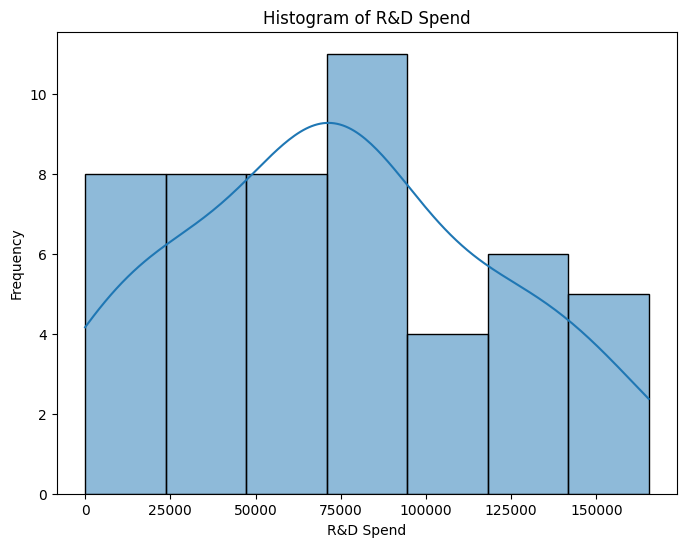

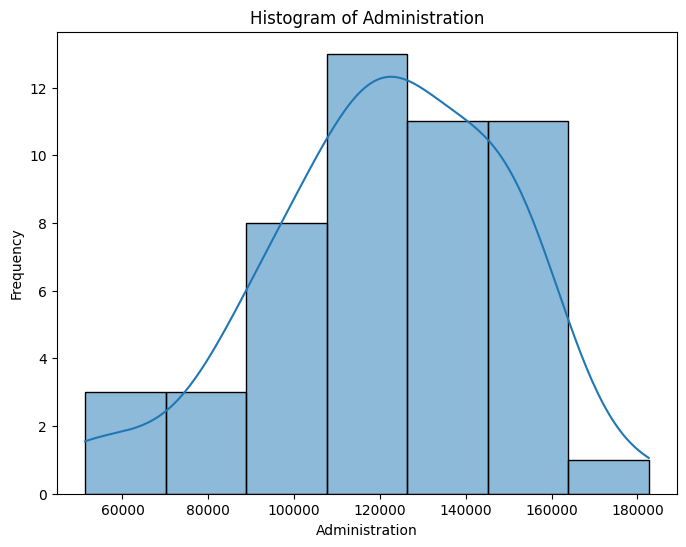

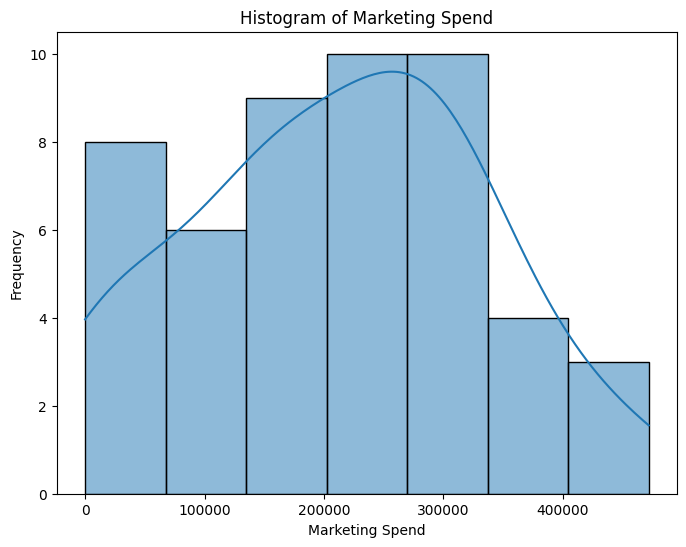

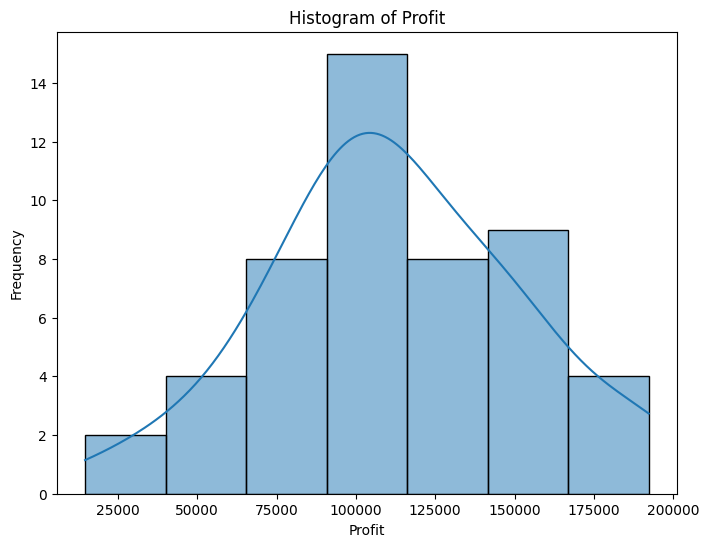

In [45]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From histogram
1. R&d spend of 75000 has the highest peak or frequency above 10 with least value at 100000 having only 4 datapoints
2. Administration has peak value for 120000 with frequency around ~12 with least frequency ~1 at 180000
3. Marketin spend has highest frequency ~10 around 200000 to ~350000
4. From the data profits of ~100000 is observed more ~14 frequencies and the least observed profit 25000

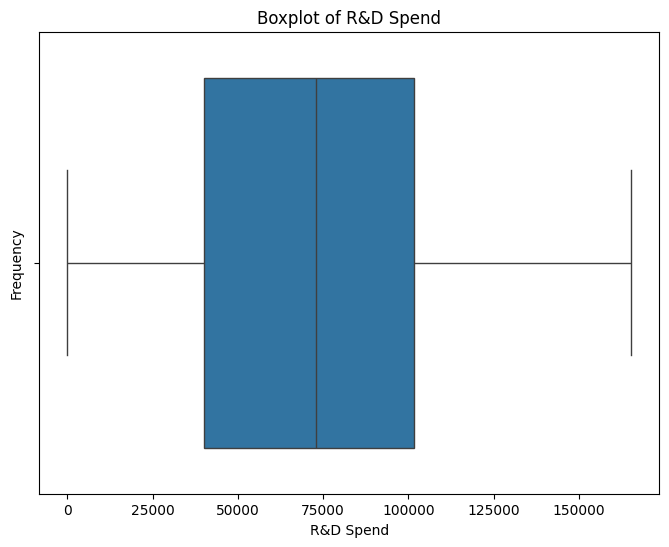

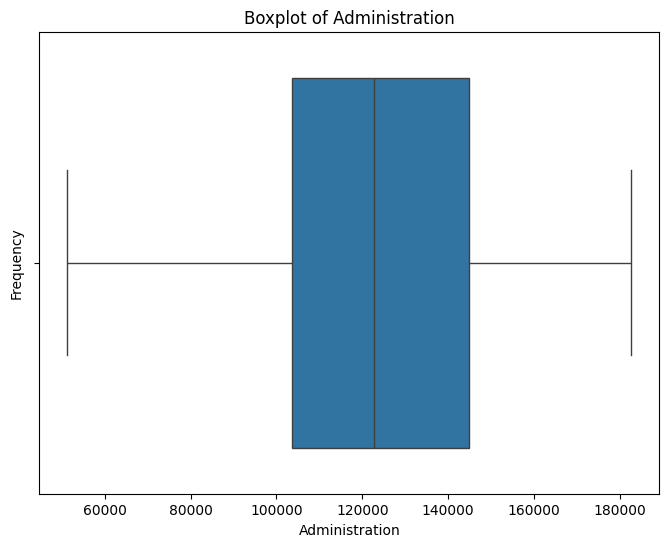

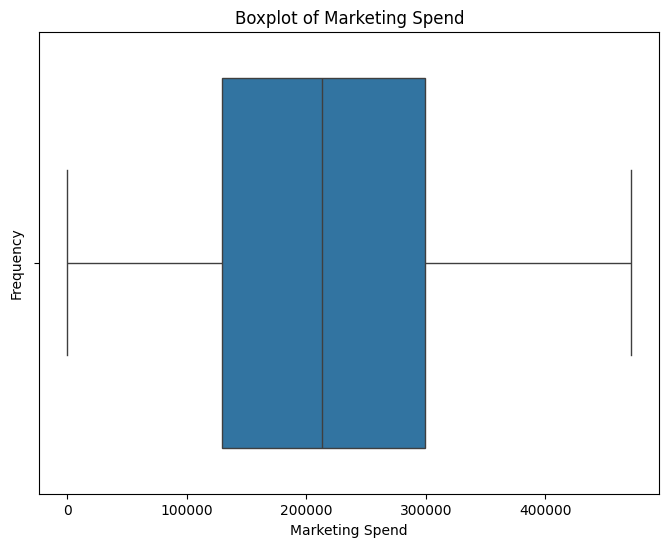

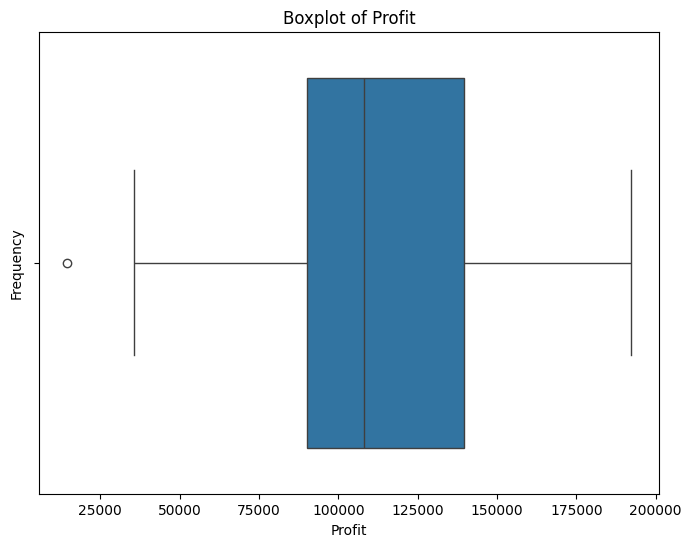

In [46]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can observe an outlier in profit
2. Except profit remaining colomns dosen't have outliers

In [47]:
# fix and replace outliers for profit colomn
# Calculate the IQR for the column
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the upper or lower bound
data['Profit'] = np.where(data['Profit'] > upper_bound, upper_bound, data['Profit'])
data['Profit'] = np.where(data['Profit'] < lower_bound, lower_bound, data['Profit'])


Using IQR Method to fix outliers if outliers are on the extreme points use IQR method where we subtract third quartile(75%) and first quartile(25%) to get Iqr value then calulate upperbound and lowerbound values
The IQR method is used to detect and remove outliers in a dataset. It focuses on the middle 50% of the data and filters out extreme values.

Steps to Detect Outliers Using IQR
1. Find Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Lower Quartile (25% of data is below this)
Q3 = Upper Quartile (75% of data is below this)
2.  Calculate IQR:
* IQR=Q3−Q1

This gives the range of the middle 50% of values.

3. Set Outlier Boundaries:
* Lower Bound:
 * Q1−1.5×IQR
* Upper Bound:
 * Q3+1.5×IQR
4. Remove Outliers:

Any value below the lower bound or above the upper bound is considered an outlier.

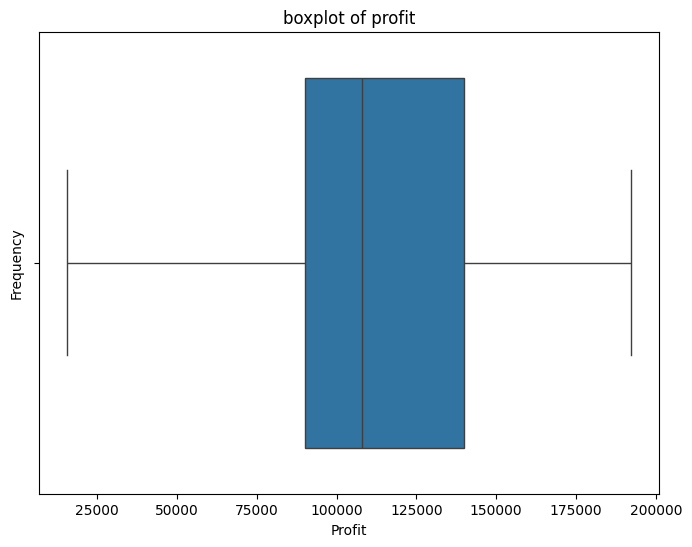

In [48]:
#Boxplot for profit
plt.figure(figsize=(8,6))
sns.boxplot(x='Profit',data=data)
plt.title("boxplot of profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

From the boxplot we can observe the outliers are fixed

In [49]:
#Values count for each object in state colomn
data['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


In [50]:
#Printing the last 5 colomns
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,15698.29


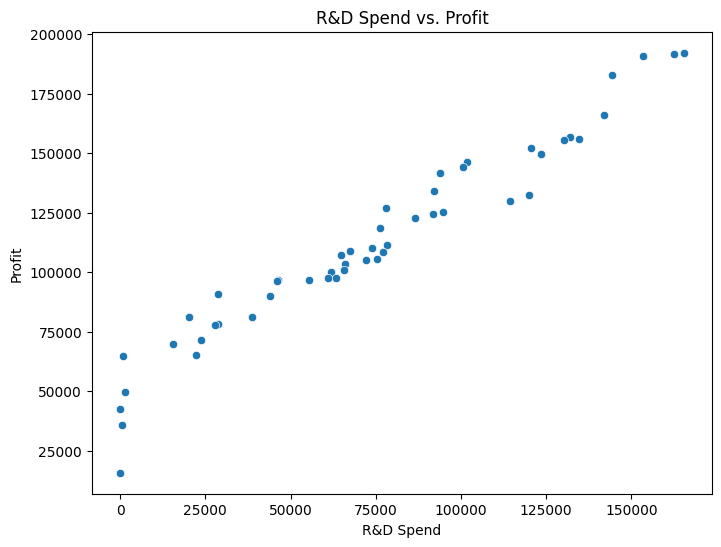

In [51]:
#Scatter plot between r&d spend and profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('R&D Spend vs. Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

1. The scatter plot shows an upward trend, meaning as R&D Spend increases, Profit also increases.
This suggests a strong positive correlation between R&D investment and profit.
2. The points are fairly aligned in a straight pattern, indicating a linear relationship.
3. A linear regression model might be a good fit for prediction.

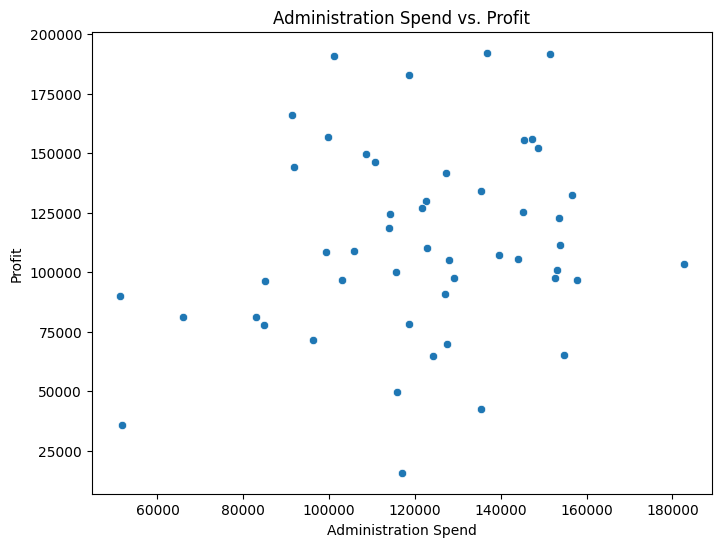

In [52]:
#Scaterplot of Administration Spend vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Administration', y='Profit', data=data)
plt.title('Administration Spend vs. Profit')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()

1. The data points are scattered randomly with no clear trend.
2. This suggests that Administration Spend has little to no direct impact on Profit.

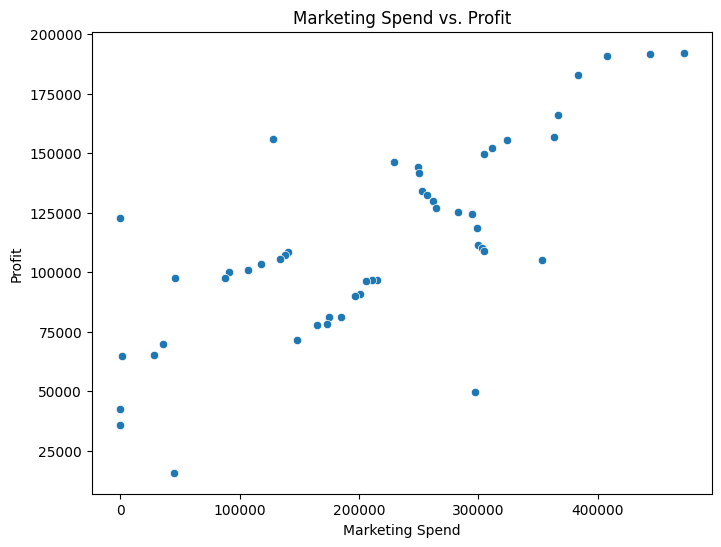

In [53]:
# Marketing Spend vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.title('Marketing Spend vs. Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

From the scatterplot we can observe some clusters around 100000, 200000,300000 and the points show an upward trend meaning higher marketing ammount spend results to high profit
2. AS it is not a clear linear regression we can assume other factors might also after the profits
3. Marketing spend above 300000 does not show much profits and few companies with less ammount spent on marketing obtained moderate profits which means high marketing spend dosen't always return high profits

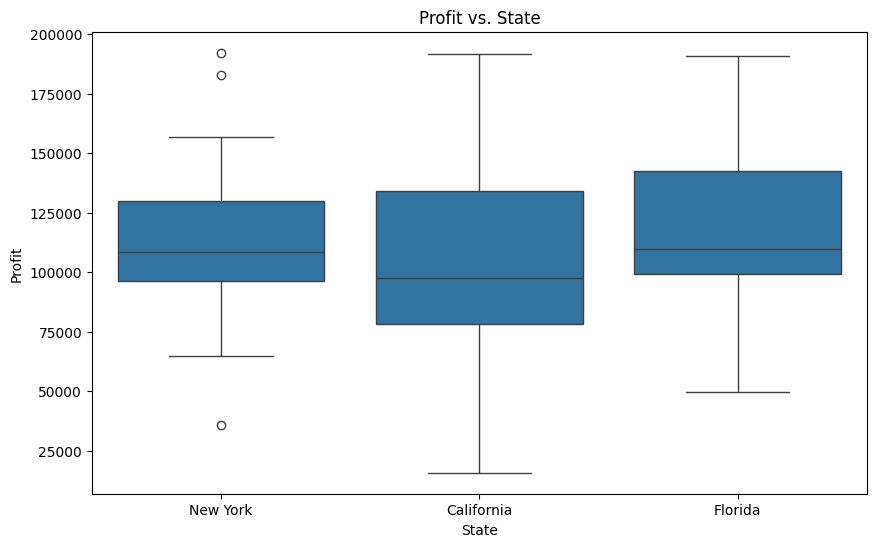

In [54]:
# boxplot for Profit vs. State
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=data)
plt.title('Profit vs. State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

1. From the plot we can observe claifornia (2) has most startups having moderate profits around ~80000 to ~135000
2. Florida (3) has high profits from 100000 to ~140000 but moderate number of startups
3. new york (1) has less startup with moderate profits around ~90000 to ~130000 but it has few outlier which might suggest few starts have very less profits around ~30000 and few had very high profits around ~180000 and ~185000

In [55]:
# getting dummy values for the 'State' column
state_dummies = pd.get_dummies(data['State'], prefix='State').astype(int)

# Concatenate the dummy variables with the original DataFrame
data = pd.concat([data, state_dummies], axis=1)

# Display the updated DataFrame
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

   State_California  State_Florida  State_New York  
0                 0              0               1  
1                 1              0               0  
2                 0              1               0  
3                 0              0               1  
4                 0              1               0  


In [56]:
#Droping the state colomn
data.drop('State',axis=1,inplace=True)

In [57]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


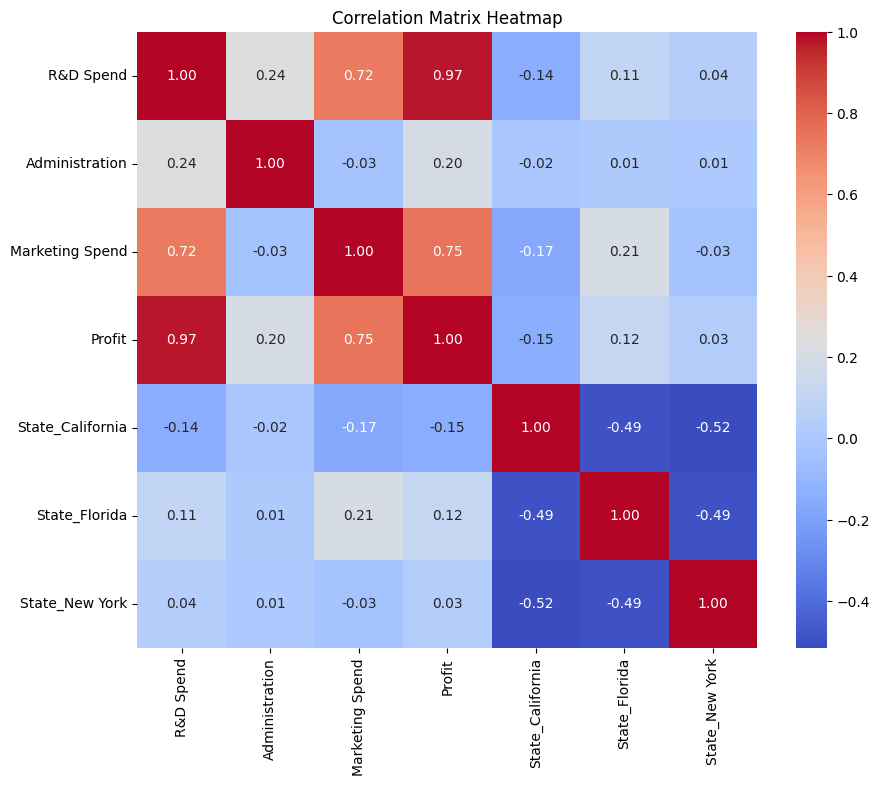

In [58]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. From the Heatmap we can observe R&D spend and profit have high correlation value which is 0.97
2. Marketing spend and profit has a corr of 0.75
3. So we can conclude from the data that as the investment such as R&d and marketing spend increase the profits in return also increase

In [59]:
# printing the data values in an array
data.values


array([[1.65e+05, 1.37e+05, 4.72e+05, 1.92e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.63e+05, 1.51e+05, 4.44e+05, 1.92e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.53e+05, 1.01e+05, 4.08e+05, 1.91e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.44e+05, 1.19e+05, 3.83e+05, 1.83e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.42e+05, 9.14e+04, 3.66e+05, 1.66e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.32e+05, 9.98e+04, 3.63e+05, 1.57e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.35e+05, 1.47e+05, 1.28e+05, 1.56e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.30e+05, 1.46e+05, 3.24e+05, 1.56e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.21e+05, 1.49e+05, 3.12e+05, 1.52e+05, 0.00e+00, 0.00e+00,
        1.00e+00],
       [1.23e+05, 1.09e+05, 3.05e+05, 1.50e+05, 1.00e+00, 0.00e+00,
        0.00e+00],
       [1.02e+05, 1.11e+05, 2.29e+05, 1.46e+05, 0.00e+00, 1.00e+00,
        0.00e+00],
       [1.01e+05, 9.18e+04, 2.50e+05, 1.44e

In [60]:
#Scaling the data
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.   0.65 1.   1.   0.   0.   1.  ]
 [0.98 0.76 0.94 1.   1.   0.   0.  ]
 [0.93 0.38 0.86 0.99 0.   1.   0.  ]
 [0.87 0.51 0.81 0.95 0.   0.   1.  ]
 [0.86 0.31 0.78 0.85 0.   1.   0.  ]]


In [61]:
# Standardize data (0 mean, 1 stdev)
array = data.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 2.02  0.56  2.15  2.01 -0.72 -0.69  1.39]
 [ 1.96  1.08  1.92  2.    1.39 -0.69 -0.72]
 [ 1.75 -0.73  1.63  1.98 -0.72  1.46 -0.72]
 [ 1.55 -0.1   1.42  1.78 -0.72 -0.69  1.39]
 [ 1.5  -1.08  1.28  1.36 -0.72  1.46 -0.72]]


 So to conclude from the data that as the investment such as R&d and marketing spend increase the profits in return also increase

##Linear Regression (Simple & Multiple)
Linear Regression is a supervised learning algorithm that models the relationship between a dependent variable (y) and one or more independent variables (X) using a straight-line equation.

In [62]:
#importing neccesary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
#Linear regression to predict profit
# Define features (X) and target variable (y)
X = data.drop('Profit', axis=1)
y = data['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"rooted Mean Squared Error: {np.sqrt(mse)}")


Mean Squared Error: 81781807.16837251
R-squared: 0.8990088816317399
rooted Mean Squared Error: 9043.32942938454


1. MSE measures the average squared difference between actual and predicted charges.
2. Rmse is squared root of mse.  The scale of MSE depends on the unit of charges, so it’s better to use RMSE (Root Mean Squared Error) to interpret in dollar terms:
3. Rmse is 9043.329 this means that, on average, our predictions are off by ~$9043.
4. R² score is 0.899 ,so using all the faetures to predict charges R² score is 0.899, R²>0.8 is generally considered a good fit.But using highly correlated features since we observed high corr between R&d and marketing with charges we could get better results.

In [64]:
# profit Prediction
new_data = pd.DataFrame({'R&D Spend': [150000], 'Administration': [100000], 'Marketing Spend': [200000], 'State_California': [1], 'State_Florida': [0], 'State_New York': [0]})
new_prediction = model.predict(new_data)
print(f"Predicted Profit: {new_prediction[0]}")

Predicted Profit: 174003.81545494567


You don’t need to scale for LinearRegression() because OLS is not sensitive to feature magnitudes.

In [71]:
# Linear regression for highly correlated columns
X = data[['R&D Spend', 'Marketing Spend']]
y = data['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: R-squared)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"rooted Mean Squared Error: {np.sqrt(mse)}")

Mean Squared Error: 81781807.16837251
R-squared: 0.9475273631970037
rooted Mean Squared Error: 9043.32942938454


1. The model has a high R² value 0.9475 (good fit), suggesting strong predictive power.
2. ✅ The RMSE is relatively low compared to the scale of the target variable, meaning good accuracy.

In [70]:
# Input values for prediction
rd_spend = 150000 #@param {type:"number"}
marketing_spend = 200000 #@param {type:"number"}

# Create a DataFrame for the input values
input_data = pd.DataFrame({
    'R&D Spend': [rd_spend],
    'Marketing Spend': [marketing_spend]
})

# Use the trained model to predict the profit
y_pred = model.predict(input_data)
print(f"Predicted Profit: {y_pred[0]}")

Predicted Profit: 171122.81765326584


rd_spend: 150000
\
marketing_spend:200000
\
for these vaues Predicted Profit is 171122.81765326584
